<a href="https://colab.research.google.com/github/Aniket130598/Mobile-Price-Range-Prediction/blob/main/mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name:-Mobile price Range Prediction**

---



# Problem Statement

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# mounting  drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALMABETTER /DATA /train_data.csv')

In [ ]:
df

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,1100,1,1.6,0,12,0,15,0.1,112,...,919,1344,757,12,2,16,1,1,1,0
1396,1397,1358,0,2.5,1,0,0,20,0.6,135,...,1485,1655,3406,5,1,11,0,0,1,3
1397,1398,1034,1,2.7,1,6,0,37,0.7,120,...,707,1199,3625,17,1,12,0,1,1,3
1398,1399,703,1,2.7,0,12,1,30,0.3,113,...,218,1065,1472,14,7,7,1,0,0,0


In [ ]:
df['sc_w']=df['sc_w'].replace(0,4.356398) #Replace zero screen width by its mean value

In [ ]:
df.describe()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1400.0000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,1237.027143,0.499286,1.526071,0.505714,4.215000,0.515714,32.147143,0.505143,140.125714,...,652.376429,1244.966429,2122.869286,12.294286,6.172995,10.972143,0.756429,0.503571,0.512143,1.500000
std,404.2895,440.555073,0.500178,0.824300,0.500146,4.251417,0.499932,18.209559,0.290107,35.361221,...,447.273563,428.168423,1087.155644,4.160191,4.026634,5.546213,0.429390,0.500166,0.500031,1.118434
min,1.0000,502.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,...,0.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,350.7500,842.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,...,283.750000,874.000000,1205.750000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,700.5000,1222.500000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,141.000000,...,576.000000,1247.000000,2127.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1050.2500,1615.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,...,958.500000,1613.000000,3049.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1400.0000,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1400 non-null   int64  
 1   battery_power  1400 non-null   int64  
 2   bluetooth      1400 non-null   int64  
 3   clock_speed    1400 non-null   float64
 4   dual_sim       1400 non-null   int64  
 5   fc             1400 non-null   int64  
 6   four_g         1400 non-null   int64  
 7   int_memory     1400 non-null   int64  
 8   m_dep          1400 non-null   float64
 9   mobile_wt      1400 non-null   int64  
 10  n_cores        1400 non-null   int64  
 11  pc             1400 non-null   int64  
 12  px_height      1400 non-null   int64  
 13  px_width       1400 non-null   int64  
 14  ram            1400 non-null   int64  
 15  sc_h           1400 non-null   int64  
 16  sc_w           1400 non-null   float64
 17  talk_time      1400 non-null   int64  
 18  three_g 

In [ ]:
df.isnull().sum()

id               0
battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Checking class values are balanced or not**

In [ ]:
df["price_range"].value_counts()

1    350
2    350
0    350
3    350
Name: price_range, dtype: int64

**Data Visualization**

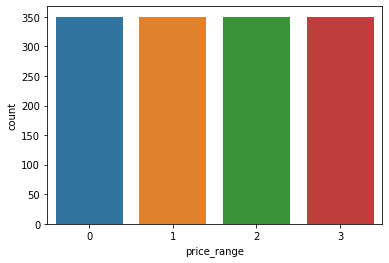

In [ ]:
#Count of values for Price range
sns.countplot(x="price_range", data=df)

In [ ]:
keys = [i  for i in df.columns]
values = [df[i].nunique() for i in keys]
dt = pd.DataFrame()
dt['features'] = keys
dt['nunique'] = values
dt

,features,nunique
0,id,1400
1,battery_power,919
2,bluetooth,2
3,clock_speed,26
4,dual_sim,2
5,fc,19
6,four_g,2
7,int_memory,63
8,m_dep,10
9,mobile_wt,121


# Correlation

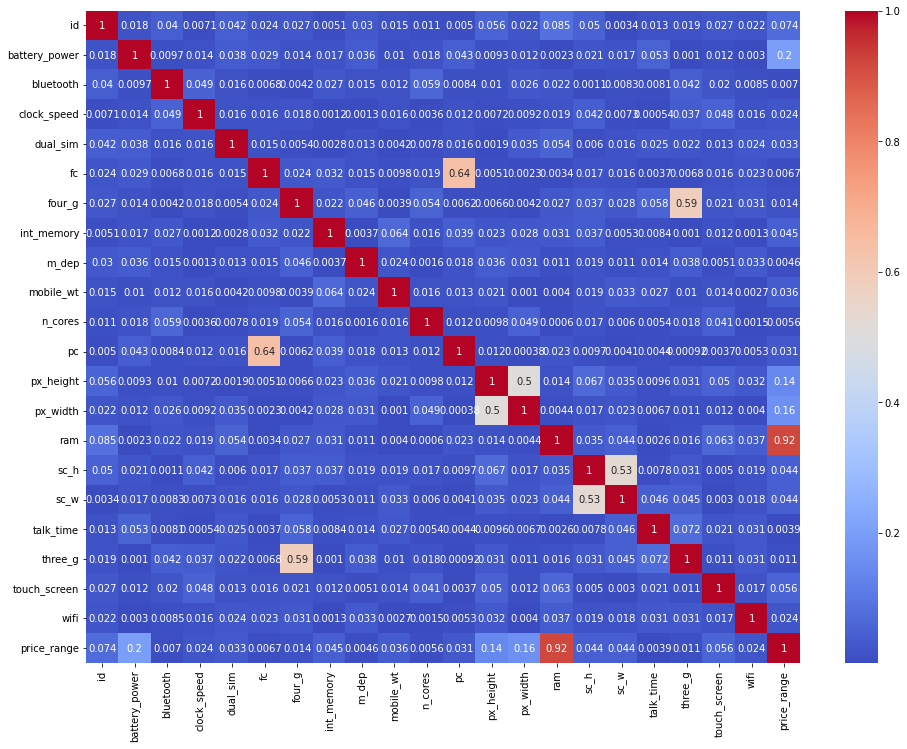

In [ ]:
## Correlation
plt.figure(figsize=(16,12))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

**Distribution of features**

In [ ]:
numeric_features = ['battery_power','clock_speed','m_dep','mobile_wt','n_cores','px_height','px_width','ram','fc','int_memory','pc','sc_h','sc_w','talk_time']
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

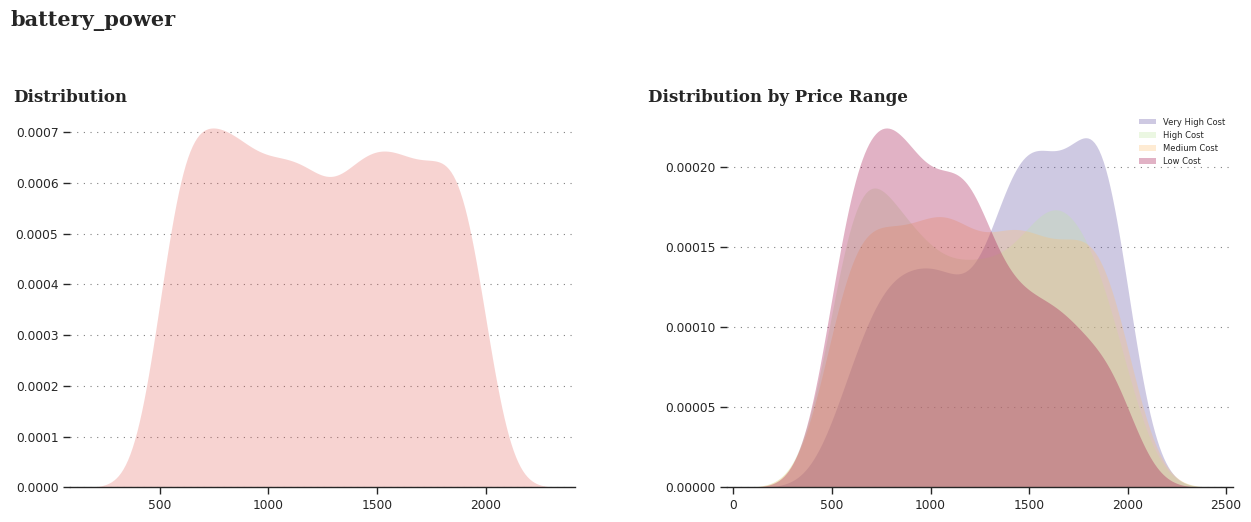

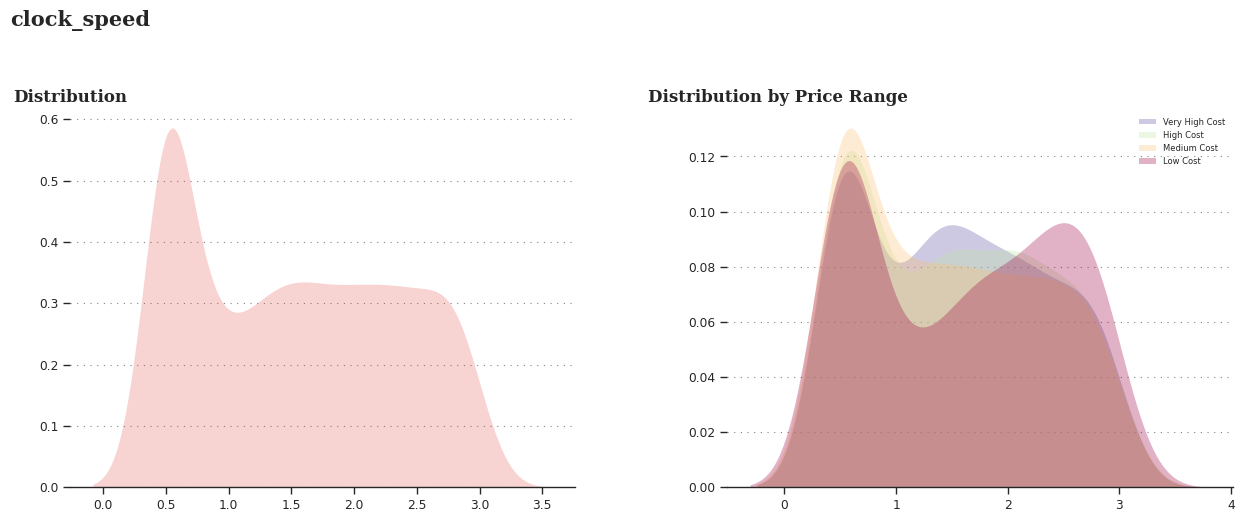

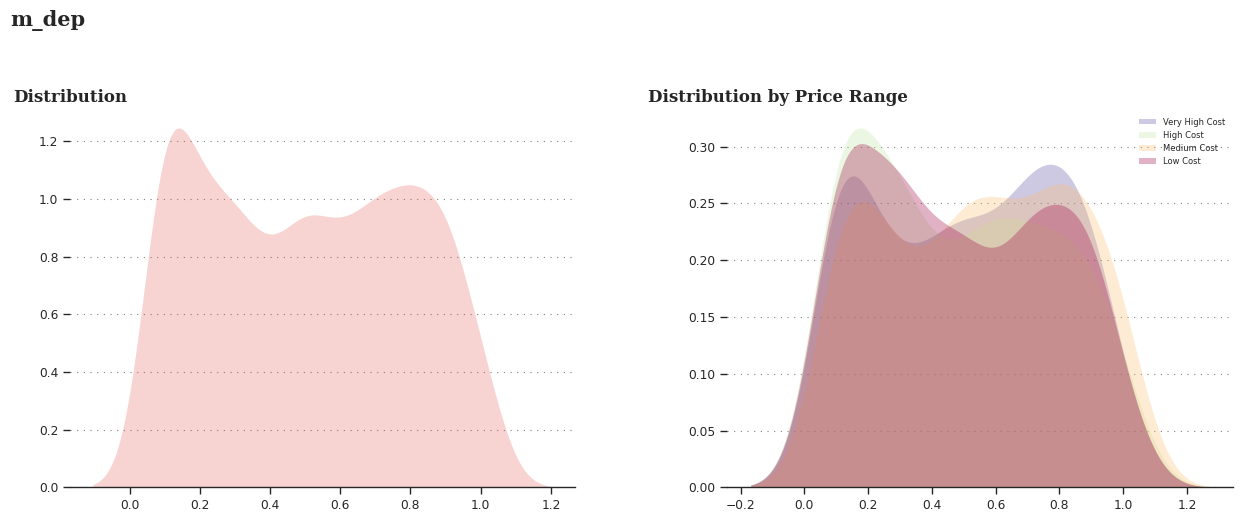

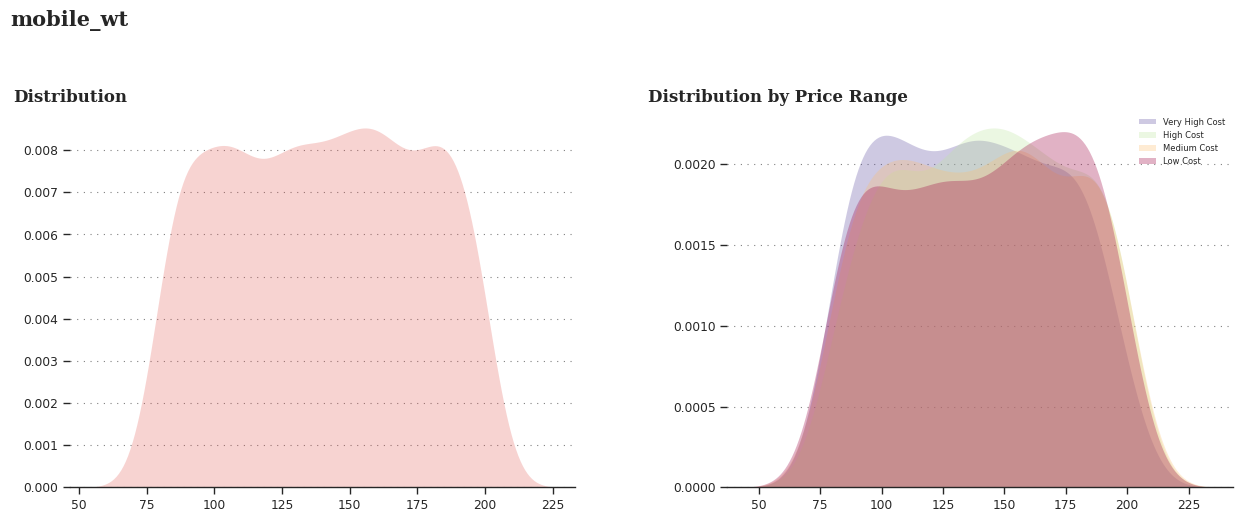

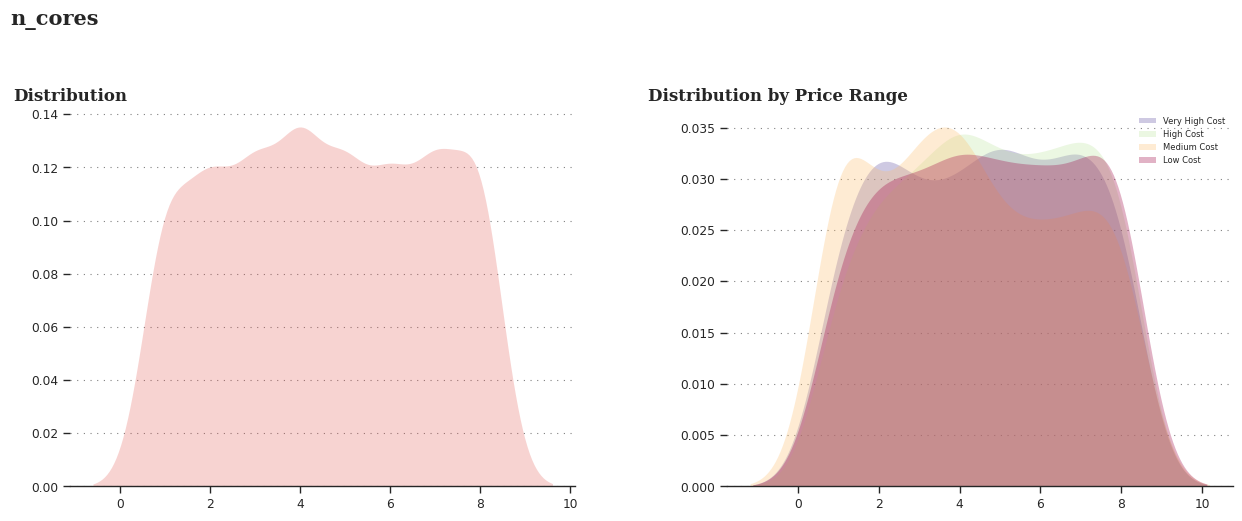

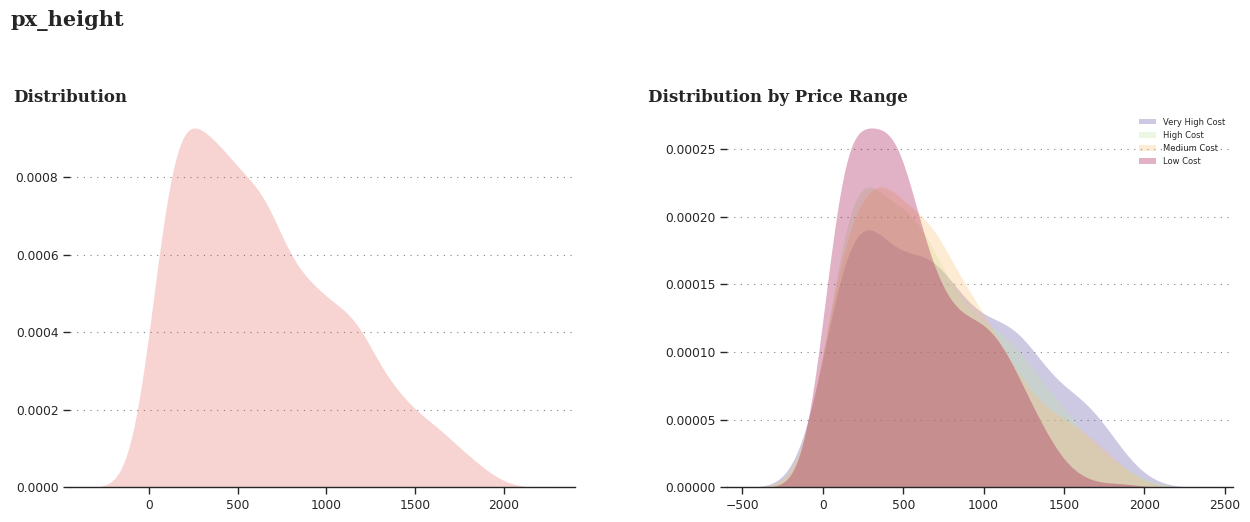

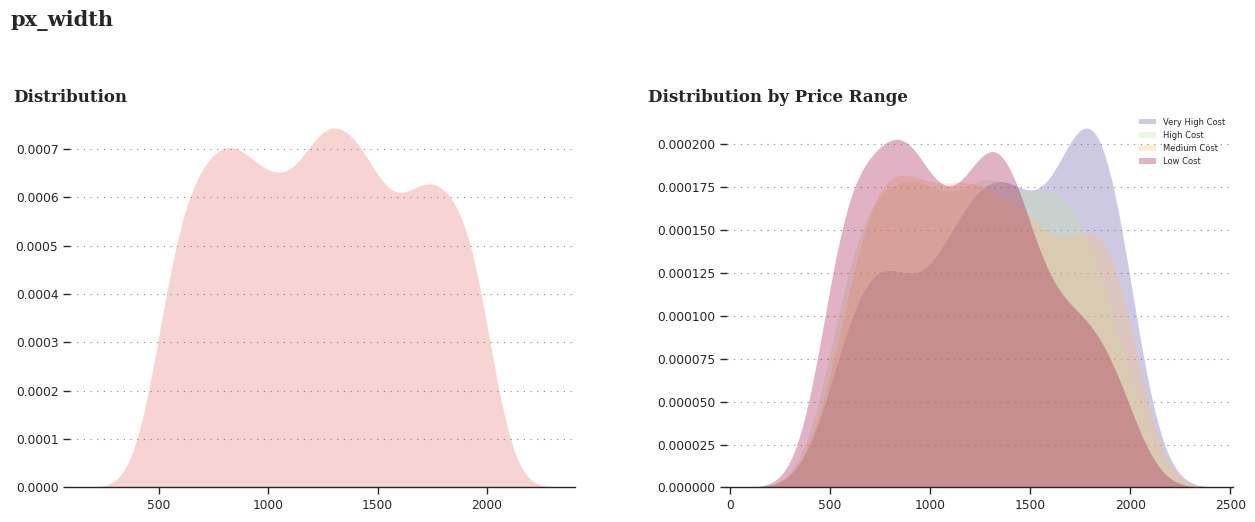

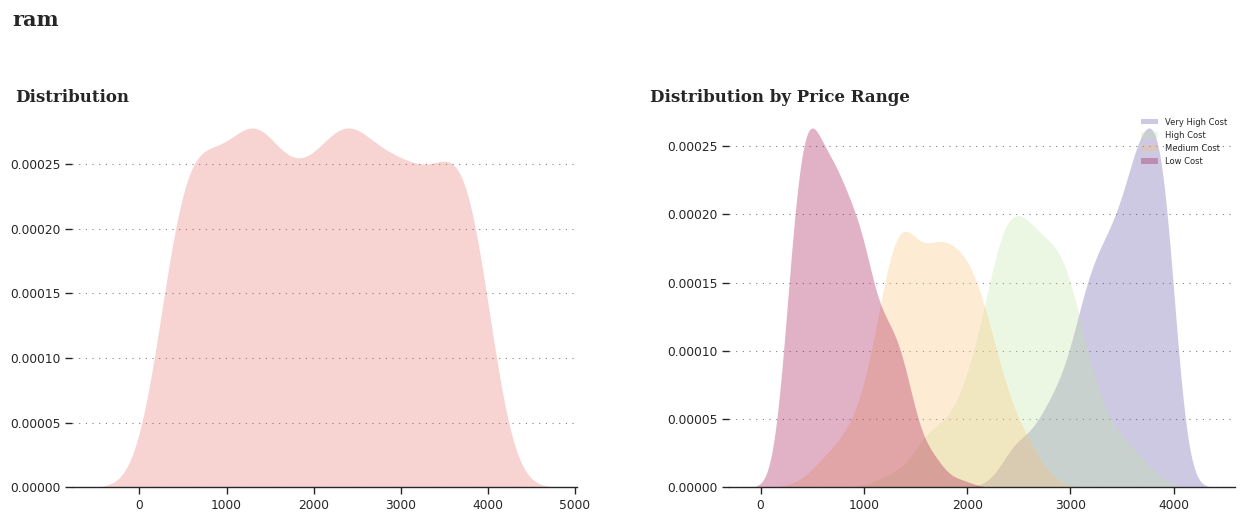

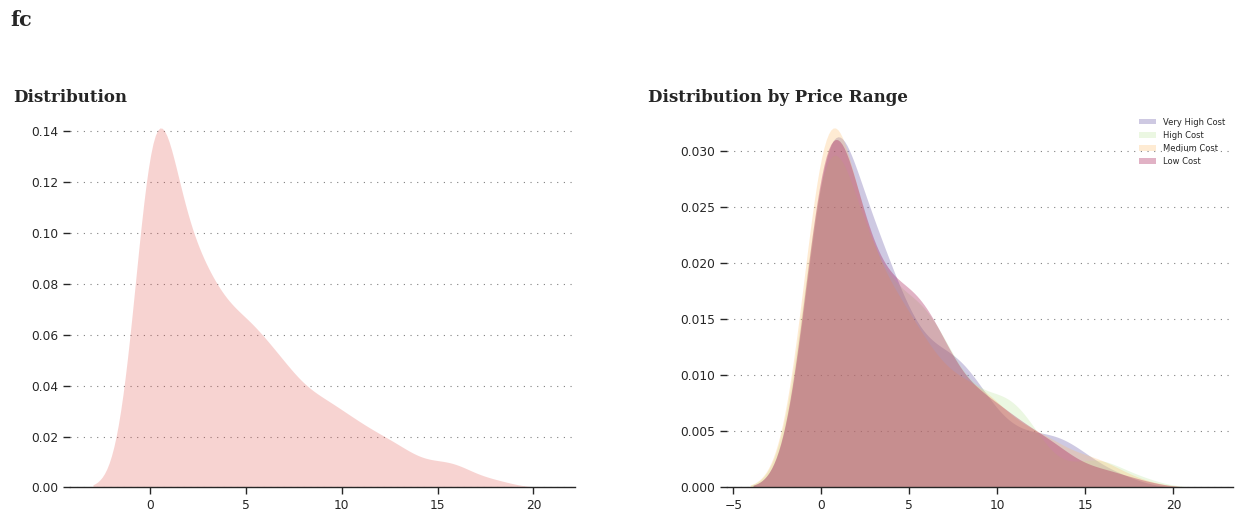

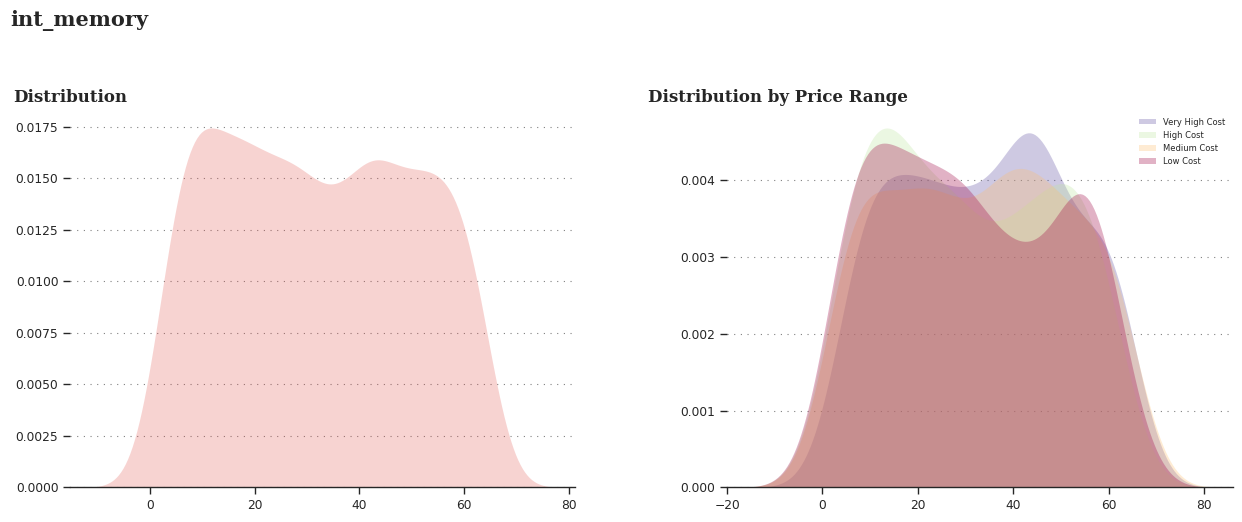

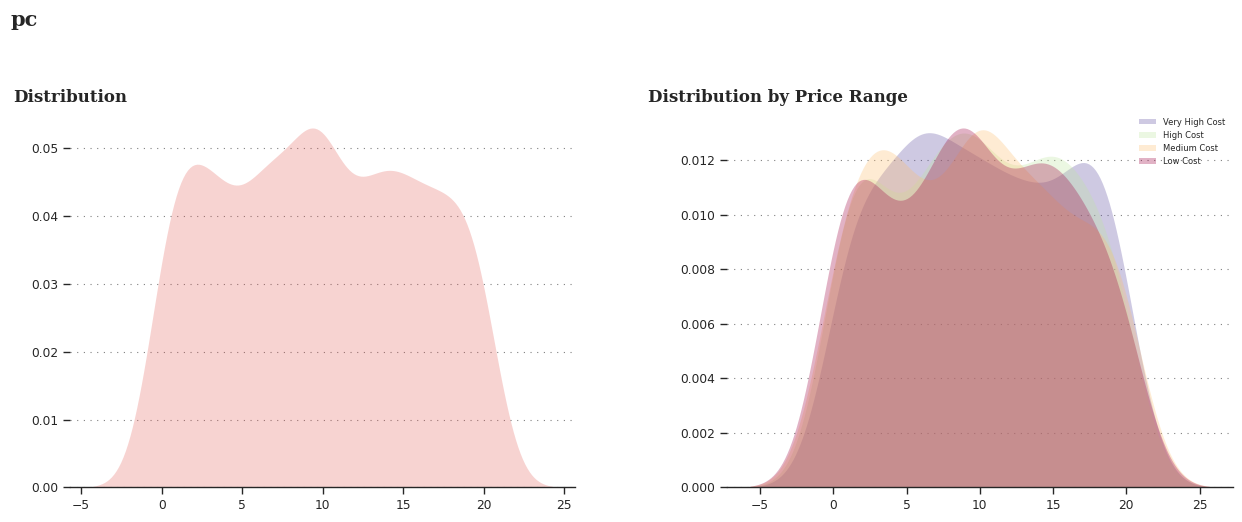

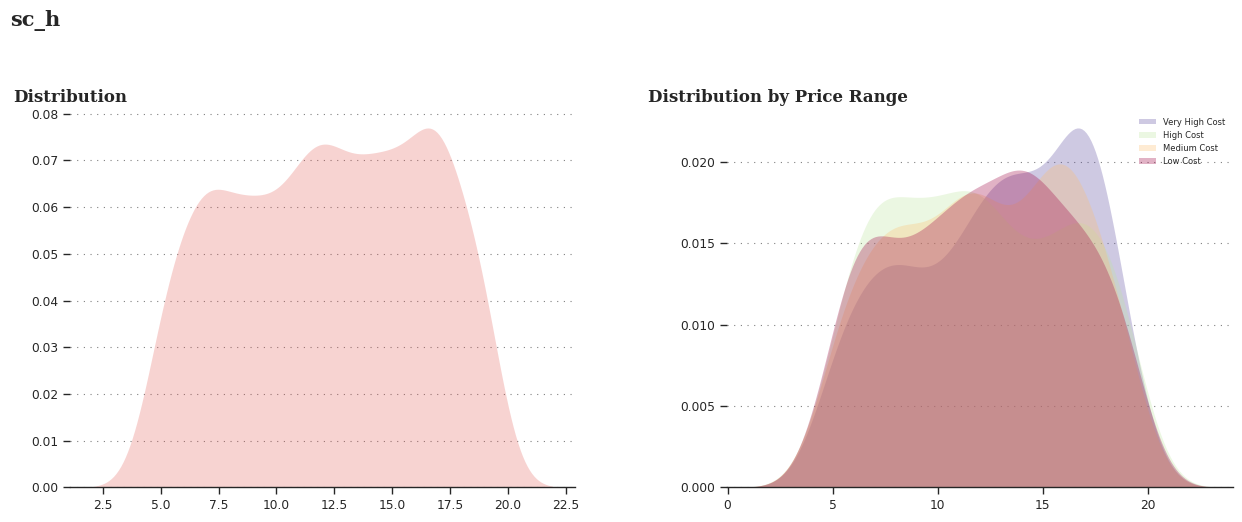

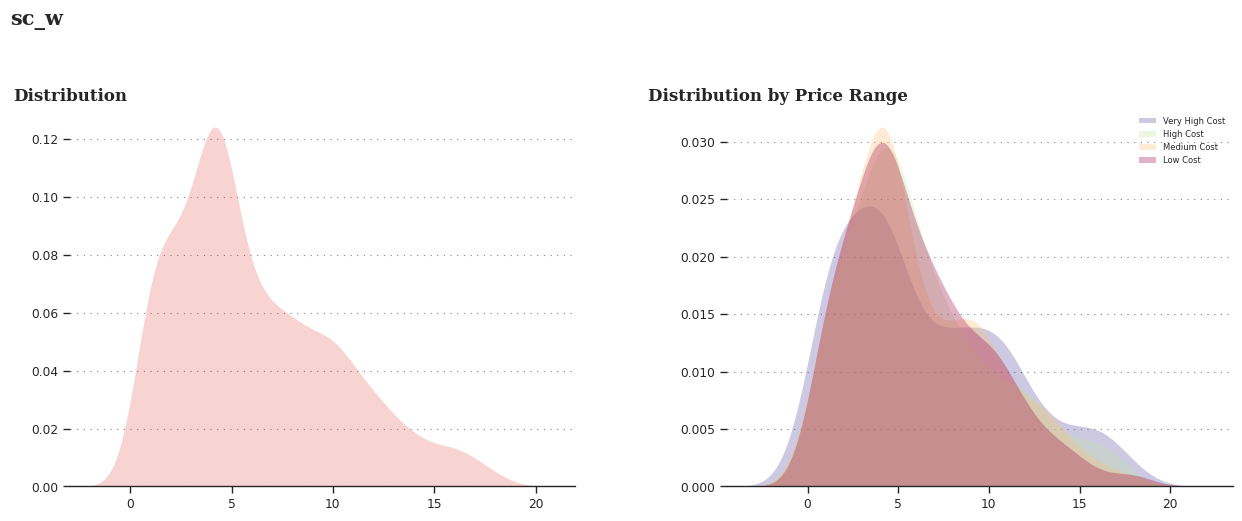

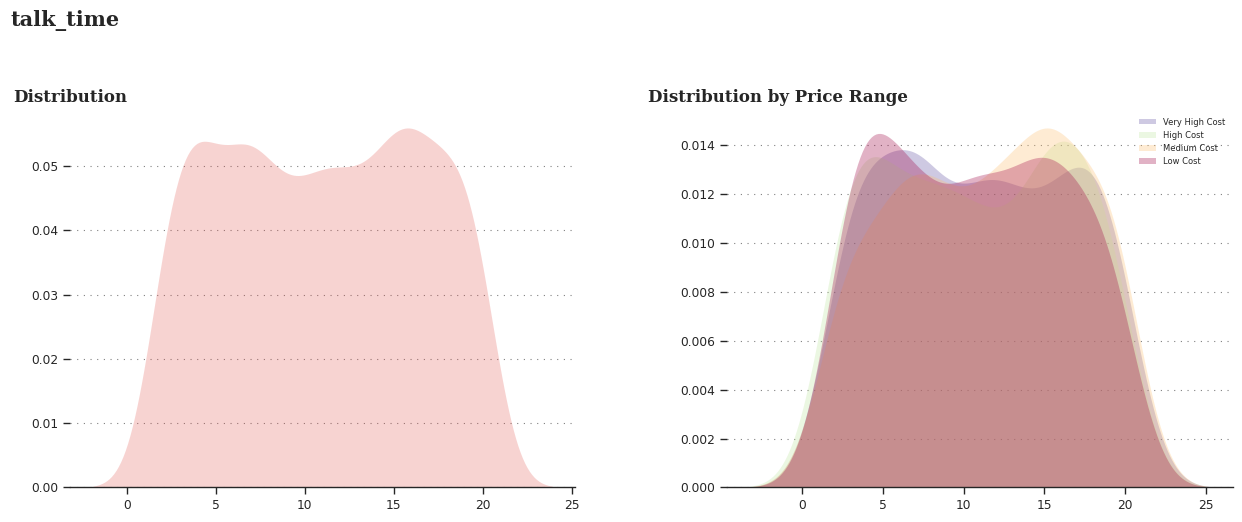

In [ ]:
for i in numeric_features:
  sns.set(rc={"figure.dpi":100})
  sns.set_context('paper')
  sns.set_style("ticks")

  fig = plt.figure(figsize=(15,12))
  gs = fig.add_gridspec(2, 2)
  gs.update(wspace=0.3, hspace=0.4)
  fig.text(0.085,0.95,i, fontfamily='serif',fontsize=15, fontweight='bold')
  sns.set_palette('Spectral')

  ax0 = fig.add_subplot(gs[0, 0])
  ax1 = fig.add_subplot(gs[0, 1])
 
#Axis 0 

  ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  sns.kdeplot(x=i,
            data=df,
            shade=True,
            ax=ax0,
            linewidth = 0
            )

  ax0.set_xlabel("")
  ax0.set_ylabel("")
  ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1)
  ax0.spines['top'].set_visible(False)
  ax0.spines['right'].set_visible(False)
  ax0.spines['left'].set_visible(False)


  #Axis 1 

  ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  sns.kdeplot(x=i,
           hue='price_range',
           shade=True,
           data=df,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )

  ax1.set_xlabel("")
  ax1.set_ylabel("")
  ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
  ax1.legend(['Very High Cost','High Cost','Medium Cost','Low Cost '],fontsize=6,frameon=False)
  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(False)
  ax1.spines['left'].set_visible(False)

In [ ]:
df

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4.0,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1.0,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5.0,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11.0,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5.0,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,1100,1,1.6,0,12,0,15,0.1,112,...,919,1344,757,12,2.0,16,1,1,1,0
1396,1397,1358,0,2.5,1,0,0,20,0.6,135,...,1485,1655,3406,5,1.0,11,0,0,1,3
1397,1398,1034,1,2.7,1,6,0,37,0.7,120,...,707,1199,3625,17,1.0,12,0,1,1,3
1398,1399,703,1,2.7,0,12,1,30,0.3,113,...,218,1065,1472,14,7.0,7,1,0,0,0


# Jointplot for ram

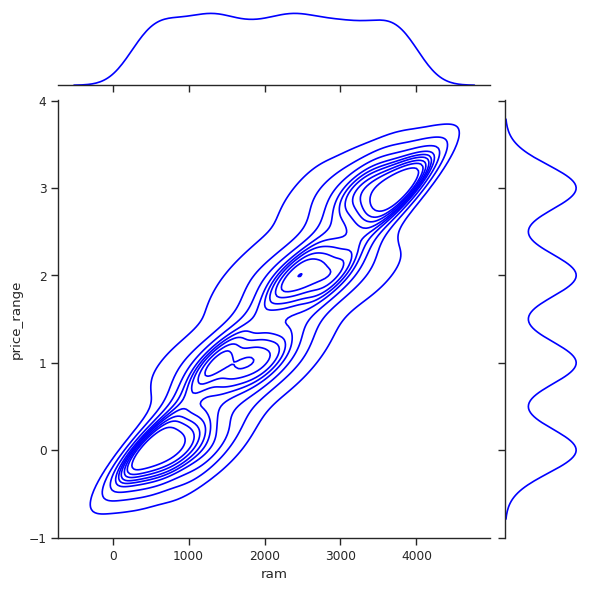

In [ ]:
sns.jointplot(x='ram',y='price_range',data=df,color='blue',kind='kde')

# Chi-Square Test for Independence

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
catagory=['dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
p_value=[]
is_significant_relationship=[]

for i in catagory:
     
    data=pd.crosstab(df[i], df['price_range'], margins=True)
    stat, p, dof, expected = chi2_contingency(data)
    p_value.append(p)
    if p<=0.05:
      is_significant_relationship.append('YES')
    else:
      is_significant_relationship.append('NO')

In [ ]:
chi2_table=pd.DataFrame(list(zip(catagory,p_value,is_significant_relationship)),columns=['catagory','p_value','is_significant_relationship'])

In [ ]:
chi2_table

,catagory,p_value,is_significant_relationship
0,dual_sim,0.979201,NO
1,four_g,0.843093,NO
2,n_cores,0.765630,NO
3,three_g,0.999993,NO
4,touch_screen,0.243434,NO
5,wifi,0.998688,NO


# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[df.columns.difference(['price_range'])],
                                                   df['price_range'],
                                                   test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(1120, 21)
(280, 21)


# Support Vector Machine Classifier

In [ ]:
clf = svm.SVC(kernel='poly')

In [ ]:
clf.fit(X_train,y_train)

SVC(kernel='poly')

In [ ]:
#check training data accuracy
clf_train_pred = clf.predict(X_train)

clf_train_accuracy = accuracy_score(clf_train_pred, y_train)

In [ ]:
print("Accuracy on training data:",clf_train_accuracy )

Accuracy on training data: 0.9580357142857143


In [ ]:
from sklearn.metrics import classification_report
report_train=classification_report(clf_train_pred, y_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       295
           1       0.95      0.95      0.95       275
           2       0.93      0.96      0.94       271
           3       0.97      0.96      0.96       279

    accuracy                           0.96      1120
   macro avg       0.96      0.96      0.96      1120
weighted avg       0.96      0.96      0.96      1120



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


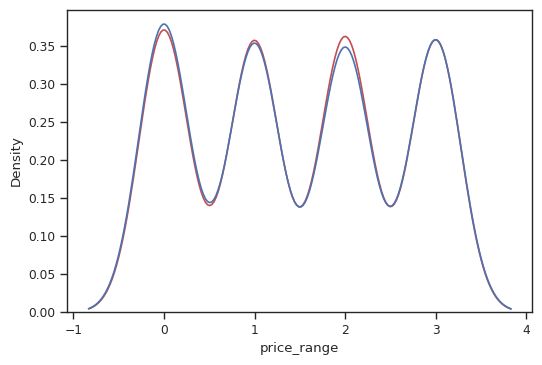

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(clf_train_pred,hist=False,color="b",ax=ax1)

**Model Testing**

In [ ]:
#check testing data accuracy
clf_test_pred = clf.predict(X_test)

clf_test_accuracy = accuracy_score(clf_test_pred, y_test)

In [ ]:
print("Accuracy on test data:",clf_test_accuracy )

Accuracy on test data: 0.925


In [ ]:
report_test=classification_report(clf_test_pred, y_test)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        71
           1       0.82      0.97      0.89        63
           2       0.93      0.89      0.91        73
           3       0.96      0.96      0.96        73

    accuracy                           0.93       280
   macro avg       0.93      0.93      0.92       280
weighted avg       0.93      0.93      0.93       280



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


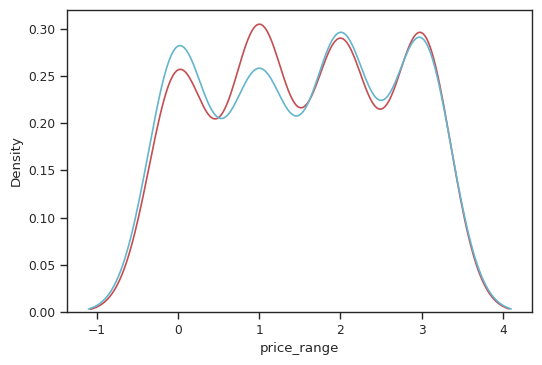

In [ ]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(clf_test_pred,hist=False,color="c",ax=ax1)

# Random forest Classifier

# Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=42, shuffle=False)



In [ ]:
grid_values = {'n_estimators':[75, 80, 85, 90], 'max_depth':[7, 9, 11, 13], "max_leaf_nodes": [35, 40, 45, 50]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'max_leaf_nodes': [35, 40, 45, 50],
                         'n_estimators': [75, 80, 85, 90]},
             scoring='accuracy')

In [ ]:
classifier.best_params_

{'max_depth': 11, 'max_leaf_nodes': 50, 'n_estimators': 90}

# Model Training

In [ ]:
rf = RandomForestClassifier(max_depth=11,max_leaf_nodes= 50 ,random_state=0,n_estimators= 90)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=50, n_estimators=90,
                       random_state=0)

In [ ]:
#check training data accuracy
rf_train_pred = rf.predict(X_train)

rf_train_accuracy = accuracy_score(rf_train_pred, y_train)

In [ ]:
print("Accuracy on test data:",rf_train_accuracy )

Accuracy on test data: 0.9714285714285714


In [ ]:
train_report=classification_report(rf_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       293
           1       0.94      0.96      0.95       270
           2       0.96      0.96      0.96       280
           3       0.99      0.99      0.99       277

    accuracy                           0.97      1120
   macro avg       0.97      0.97      0.97      1120
weighted avg       0.97      0.97      0.97      1120



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


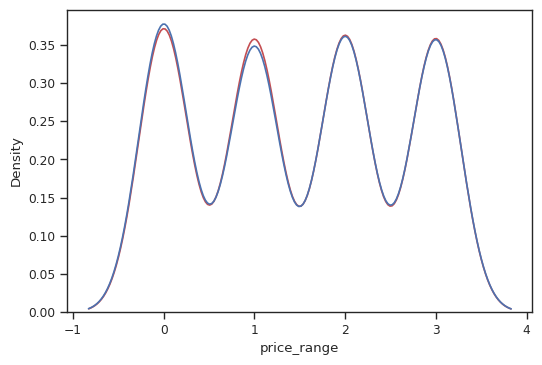

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(rf_train_pred,hist=False,color="b",ax=ax1)

# Model Testing

In [ ]:
#check testing data accuracy
rf_test_pred = rf.predict(X_test)

rf_test_accuracy = accuracy_score(rf_test_pred, y_test)

In [ ]:
print("Accuracy on test data:",rf_test_accuracy )

Accuracy on test data: 0.8142857142857143


In [ ]:
test_report=classification_report(rf_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89        74
           1       0.72      0.82      0.76        65
           2       0.67      0.77      0.72        61
           3       0.92      0.84      0.88        80

    accuracy                           0.81       280
   macro avg       0.82      0.81      0.81       280
weighted avg       0.83      0.81      0.82       280



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


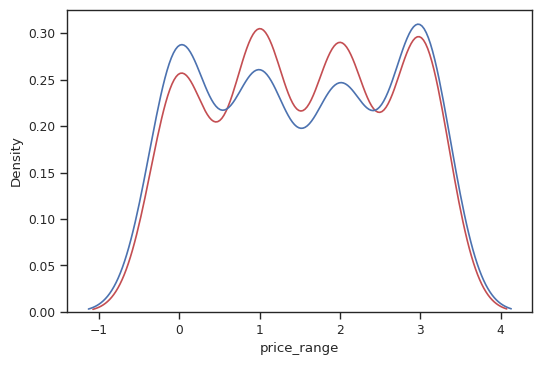

In [ ]:
#plot test accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(rf_test_pred,hist=False,color="b",ax=ax1)

**Importance of features**

In [ ]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


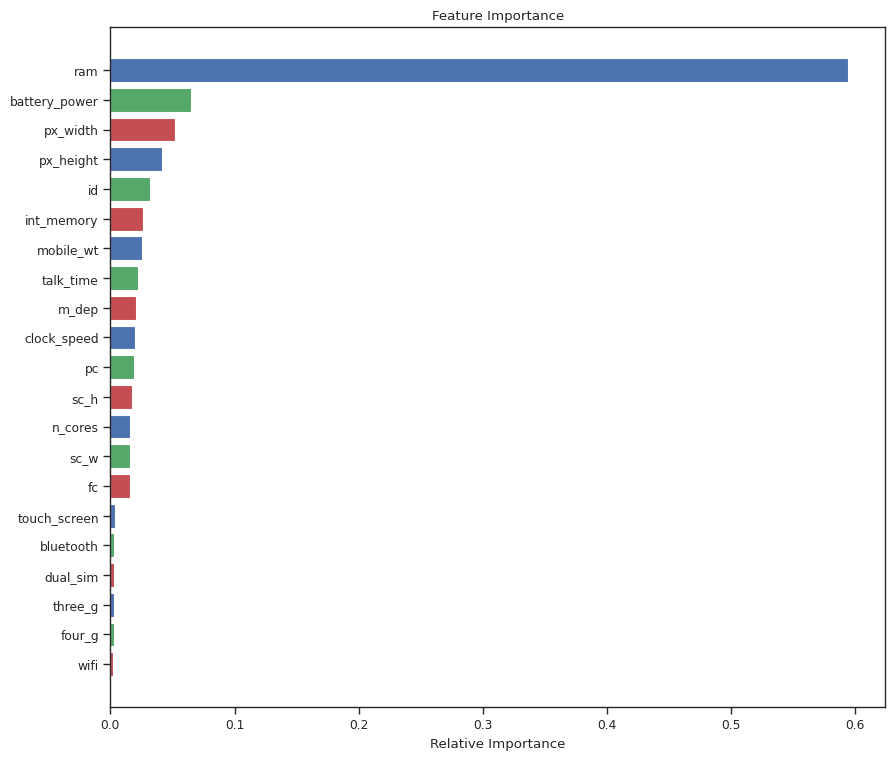

In [ ]:
fig = plt.figure(figsize=(10,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='rgb', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random forest model with ram,battery_power,px_height,px_width,int_memory features

In [ ]:
imp_fea_df=df[['ram','battery_power','px_height','px_width']]
imp_fea_df

,ram,battery_power,px_height,px_width
0,2319,807,245,829
1,3078,1065,188,928
2,263,1171,248,755
3,2581,609,58,1253
4,1958,1193,1442,1904
...,...,...,...,...
1395,757,1100,919,1344
1396,3406,1358,1485,1655
1397,3625,1034,707,1199
1398,1472,703,218,1065


In [ ]:
x_imp= imp_fea_df
Y_imp=df['price_range']

In [ ]:
#applying minmaxscaler
scaler=MinMaxScaler()
X=scaler.fit_transform(x_imp)

In [ ]:
#train test split
from sklearn.model_selection import train_test_split 
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split( x_imp, Y_imp , test_size = 0.2, random_state = 0) 

# Training Model

In [ ]:
rf = RandomForestClassifier(max_depth=11,max_leaf_nodes= 50 ,random_state=0,n_estimators= 90)
rf.fit(X_imp_train,y_imp_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=50, n_estimators=90,
                       random_state=0)

In [ ]:
#check training data accuracy
rf_train_imp_pred = rf.predict(X_imp_train)

rf_train_imp_accuracy = accuracy_score(rf_train_imp_pred, y_imp_train)

In [ ]:
print("Accuracy on test data:",rf_train_imp_accuracy )

Accuracy on test data: 0.9723214285714286


In [ ]:
train_report=classification_report(rf_train_imp_pred, y_imp_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       286
           1       0.98      0.96      0.97       280
           2       0.96      0.97      0.96       278
           3       0.97      0.97      0.97       276

    accuracy                           0.97      1120
   macro avg       0.97      0.97      0.97      1120
weighted avg       0.97      0.97      0.97      1120



**Testing Model**

In [ ]:
#check testing data accuracy
rf_test_imp_pred = rf.predict(X_imp_test)

rf_test_imp_accuracy = accuracy_score(rf_test_imp_pred, y_imp_test)

In [ ]:
print("Accuracy on test data:",rf_test_imp_accuracy )

Accuracy on test data: 0.8785714285714286


In [ ]:
test_report=classification_report(rf_test_imp_pred, y_imp_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.82      0.88      0.85        69
           2       0.81      0.84      0.83        68
           3       0.93      0.89      0.91        76

    accuracy                           0.88       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.88      0.88      0.88       280



# Logistic Regression

In [ ]:
norm_df=df.copy()
norm_df=norm_df[norm_df.columns.difference(['price_range'])]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(norm_df)
norm_x=scaler.transform(norm_df)
norm_x

array([[0.20387701, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3763369 , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.44719251, 1.        , 0.48      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35561497, 1.        , 0.88      , ..., 0.        , 1.        ,
        1.        ],
       [0.13435829, 1.        , 0.88      , ..., 1.        , 0.        ,
        0.        ],
       [0.37566845, 0.        , 0.96      , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split 
Xl_train, Xl_test, yl_train, yl_test = train_test_split(norm_x,df['price_range'],test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

# Model Training

In [ ]:
reg.fit(Xl_train,yl_train)

LogisticRegression()

In [ ]:
#check training data accuracy
reg_train_pred = reg.predict(Xl_train)

reg_train_accuracy = accuracy_score(reg_train_pred, y_train)

In [ ]:
print("Accuracy on test data:",reg_train_accuracy )

Accuracy on test data: 0.9107142857142857


In [ ]:
train_report=classification_report(reg_train_pred, yl_train)
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       301
           1       0.84      0.89      0.86       260
           2       0.86      0.89      0.87       272
           3       0.97      0.94      0.95       287

    accuracy                           0.91      1120
   macro avg       0.91      0.91      0.91      1120
weighted avg       0.91      0.91      0.91      1120



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


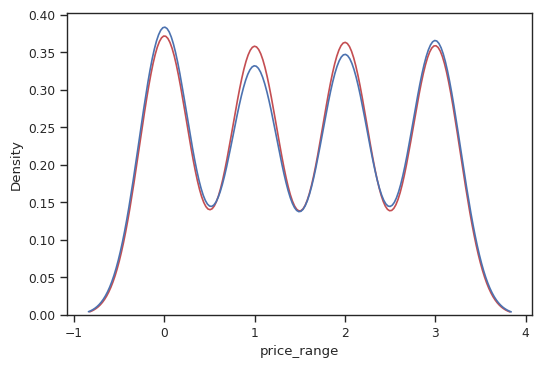

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(reg_train_pred,hist=False,color="b",ax=ax1)

**Model Testing**

In [ ]:
#check testing data accuracy
reg_test_pred = reg.predict(Xl_test)

reg_test_accuracy = accuracy_score(reg_test_pred, y_test)

In [ ]:
print("Accuracy on test data:",reg_test_accuracy )

Accuracy on test data: 0.8714285714285714


In [ ]:
test_report=classification_report(reg_test_pred, yl_test)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        77
           1       0.70      0.90      0.79        58
           2       0.81      0.86      0.84        66
           3       0.99      0.91      0.95        79

    accuracy                           0.87       280
   macro avg       0.88      0.87      0.87       280
weighted avg       0.89      0.87      0.88       280



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


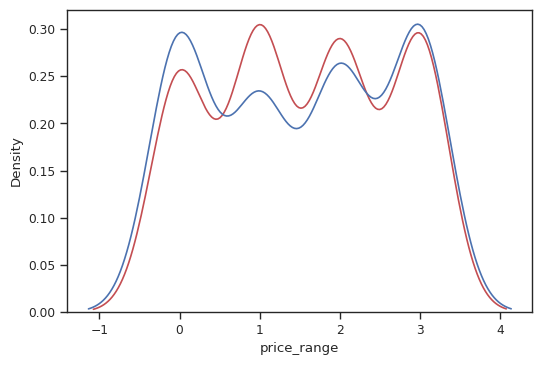

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(reg_test_pred,hist=False,color="b",ax=ax1)

# Xgboost classifier

In [ ]:
from xgboost import XGBClassifier
Xgbclf=XGBClassifier()

In [ ]:
param={
    'learning_rate':[0.01, 0.025, 0.05, 0.75, 0.10],
    'max_depth':[3,4,5],
    'n_estimators':[25,50,75,100,150,200],
}
grid_search = GridSearchCV(Xgbclf, param,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.75, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [25, 50, 75, 100, 150, 200]})

In [ ]:
grid_search.best_params_

{'learning_rate': 0.75, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
Xgbclf=XGBClassifier(learning_rate= 0.75,
 max_depth = 3,
 n_estimators = 100)
Xgbclf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.75, objective='multi:softprob')

# Model Training

In [ ]:
#check training data accuracy
xg_train_pred = Xgbclf.predict(X_train)

xg_train_accuracy = accuracy_score(xg_train_pred, y_train)

In [ ]:
print("Accuracy on test data:",xg_train_accuracy )

Accuracy on test data: 1.0


In [ ]:
train_report=classification_report(xg_train_pred, y_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00       280
           3       1.00      1.00      1.00       277

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


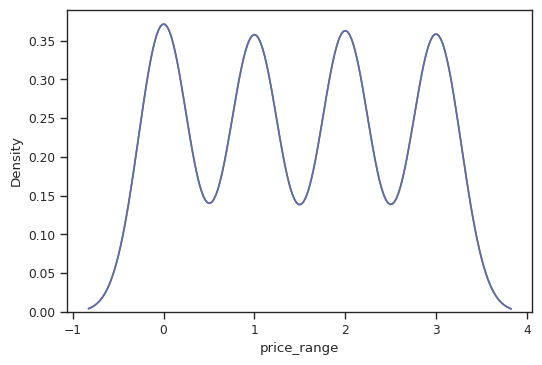

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(xg_train_pred,hist=False,color="b",ax=ax1)

# Model Testing

In [ ]:
#check testing data accuracy
xg_test_pred = Xgbclf.predict(X_test)

xg_test_accuracy = accuracy_score(xg_test_pred, y_test)

In [ ]:
print("Accuracy on test data:",xg_test_accuracy )

Accuracy on test data: 0.8821428571428571


In [ ]:
test_report=classification_report(xg_test_pred, y_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.86      0.90      0.88        71
           2       0.79      0.83      0.81        66
           3       0.93      0.86      0.89        79

    accuracy                           0.88       280
   macro avg       0.88      0.88      0.88       280
weighted avg       0.89      0.88      0.88       280



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


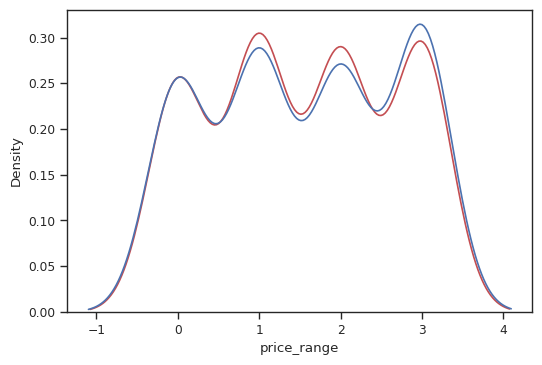

In [ ]:
#plot train accuracy 
ax1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(xg_test_pred,hist=False,color="b",ax=ax1)

In [ ]:
features = X_train.columns
importances = Xgbclf.feature_importances_
indices = np.argsort(importances)

In [ ]:
from xgboost import plot_importance

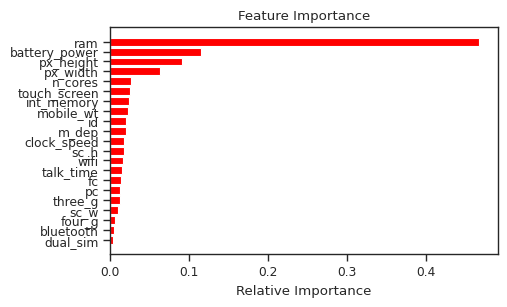

In [ ]:
fig = plt.figure(figsize=(5,3))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Conclusion:-

1.we achieve almost same accuracy using all features and using some importatnt features hence we can say that The main features that drive the mobile bphone price is ram,battery_power,pixel dimensions,int_memory.

3.We achieve 96% of accuracy on test data using SVM.it was concluded that the Logistic regression model was the best among all.